# 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241

In [1]:
import pandas as pd


data = pd.read_csv('gbm-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [2]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y = data['Activity']

In [4]:
X = data[data.columns[1:]]

In [5]:
from sklearn import model_selection


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.8, random_state=241)

# 2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее

In [6]:
from sklearn import ensemble

clfs = []
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

for i in learning_rates:
    clf = ensemble.GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i) 
    clf.fit(X_train, Y_train)
    clfs.append(clf)

      Iter       Train Loss   Remaining Time 
         1           1.0190           10.84s
         2           0.9192           11.13s
         3           0.8272            9.64s
         4           0.7834            8.36s
         5           0.7109            8.00s
         6           0.6368            8.33s
         7           0.5797            8.33s
         8           0.5610            7.71s
         9           0.5185            7.46s
        10           0.4984            7.14s
        20           0.1999            6.91s
        30           0.1313            6.09s
        40           0.0790            5.78s
        50           0.0511            5.44s
        60           0.0352            5.15s
        70           0.0245            4.77s
        80           0.0162            4.48s
        90           0.0114            4.17s
       100           0.0077            3.94s
       200           0.0004            1.21s
      Iter       Train Loss   Remaining Time 
        

* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации

In [7]:
df_train = []
df_test = []
for clf in clfs:
    df_train.append(clf.staged_decision_function(X_train))
    df_test.append(clf.staged_decision_function(X_test))

* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение

In [8]:
import numpy as np


prob_train = []
for clf in df_train:
    prob = []
    for stage_df in clf:
        prob.append(1 / (1 + np.exp(-stage_df)))
    prob_train.append(prob)

prob_test = []
for clf in df_test:
    prob = []
    for stage_df in clf:
        prob.append(1 / (1 + np.exp(-stage_df)))
    prob_test.append(prob)

* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается

In [9]:
from sklearn import metrics


loss_train = []
for clf in prob_train:
    loss_row = []
    for stage in clf:
        loss_row.append(metrics.log_loss(Y_train, stage))
    loss_train.append(loss_row)

loss_test = []
for clf in prob_test:
    loss_row = []
    for stage in clf:
        loss_row.append(metrics.log_loss(Y_test, stage))
    loss_test.append(loss_row)

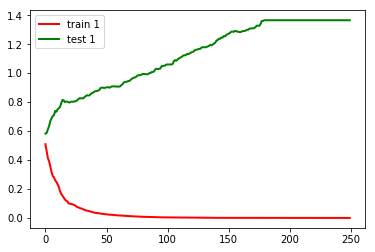

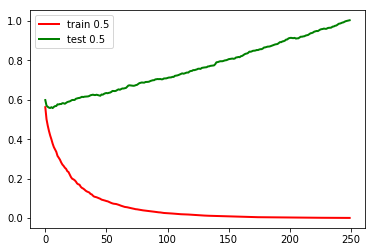

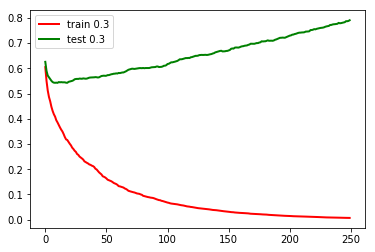

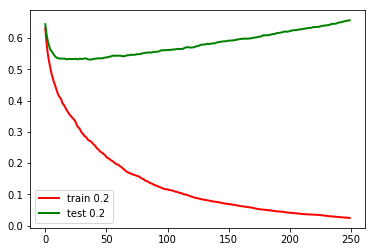

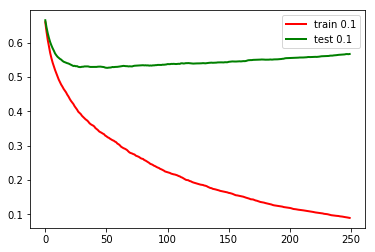

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

n = len(learning_rates)
for i in range(n):
    plt.figure()
    plt.plot(loss_train[i], 'r', linewidth=2)
    plt.plot(loss_test[i], 'g', linewidth=2)
    plt.legend(['train '+ str(learning_rates[i]), 'test ' + str(learning_rates[i])])

# 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting

**Ответ:**


overfitting

# 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2

In [15]:
loss = np.array(loss_test[3])
loss.min()

0.531094637596885

In [16]:
loss.argmin() + 1

37

**Ответ:**


0.53 37

# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [17]:
clf = ensemble.RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, Y_train)
prob_test = clf.predict_proba(X_test)

In [18]:
metrics.log_loss(Y_test, prob_test)

0.5409119099369897

#### **Ответ:**

0.54